# Predicting Whether A Customer Would Make The Premium Payment

Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', 150)

# Load Data

In [ ]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [ ]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [ ]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [ ]:
test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


# Data Cleaning

# Missing Values Treatment

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [ ]:
train.isnull().sum().sort_values(ascending=False)

application_underwriting_score      2974
Count_more_than_12_months_late        97
Count_6-12_months_late                97
Count_3-6_months_late                 97
target                                 0
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
id                                     0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

application_underwriting_score      1323
Count_more_than_12_months_late        31
Count_6-12_months_late                31
Count_3-6_months_late                 31
residence_area_type                    0
sourcing_channel                       0
no_of_premiums_paid                    0
Income                                 0
age_in_days                            0
perc_premium_paid_by_cash_credit       0
id                                     0
dtype: int64

In [ ]:
null_values = train.isnull().sum()
null_values = round((null_values/train.shape[0] * 100), 2)
null_values.sort_values(ascending=False)

application_underwriting_score      3.72
Count_more_than_12_months_late      0.12
Count_6-12_months_late              0.12
Count_3-6_months_late               0.12
target                              0.00
residence_area_type                 0.00
sourcing_channel                    0.00
no_of_premiums_paid                 0.00
Income                              0.00
age_in_days                         0.00
perc_premium_paid_by_cash_credit    0.00
id                                  0.00
dtype: float64

In [ ]:
train = train.dropna(subset=['Count_6-12_months_late', 'Count_3-6_months_late'])
train['Count_more_than_12_months_late'].fillna(np.max(train['Count_more_than_12_months_late']),inplace=True)

In [ ]:
train['application_underwriting_score'].fillna(np.mean(train['application_underwriting_score']),inplace=True)
test['application_underwriting_score'].fillna(np.mean(test['application_underwriting_score']),inplace=True)
test['Count_more_than_12_months_late'].fillna(np.max(test['Count_more_than_12_months_late']),inplace=True)
test['Count_6-12_months_late'].fillna(method = 'ffill' ,inplace=True)
test['Count_3-6_months_late'].fillna(method = 'ffill' ,inplace=True)

In [ ]:
train.isnull().values.any()

False

In [ ]:
def sourcing_channel(z):
    if z=='A':
        return 1
    if z=='B':
        return 2
    if z=='C':
        return 3
    if z=='D':
        return 4
    if z=='E':
        return 5

In [ ]:
train['sourcing_channel'] = train['sourcing_channel'].apply(sourcing_channel)
test['sourcing_channel'] = test['sourcing_channel'].apply(sourcing_channel)

# Univariate Analysis

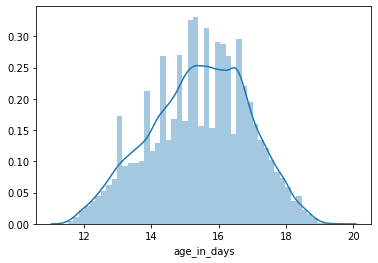

In [ ]:
train['age_in_days'] = np.power(train['age_in_days']/5 , 1/3)
test['age_in_days'] = np.power(test['age_in_days']/5 , 1/3)
sn.distplot(train['age_in_days'])

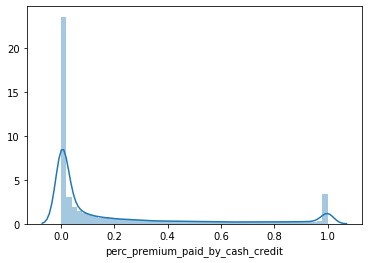

In [ ]:
train['perc_premium_paid_by_cash_credit'] = np.square(train['perc_premium_paid_by_cash_credit'])
test['perc_premium_paid_by_cash_credit'] = np.square(test['perc_premium_paid_by_cash_credit'])
sn.distplot(train['perc_premium_paid_by_cash_credit'])

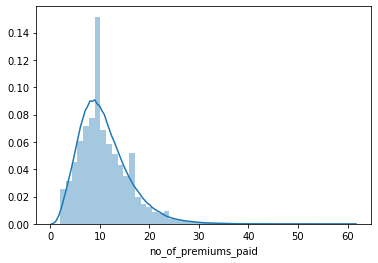

In [ ]:
sn.distplot(train['no_of_premiums_paid'])

# Bivariate Analysis

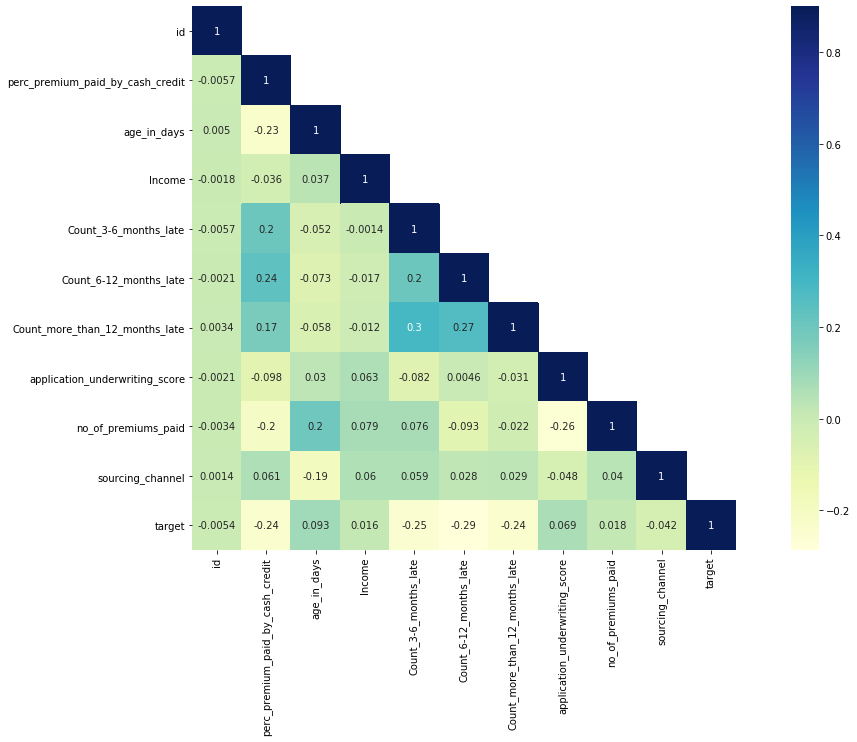

In [ ]:
corr = train[['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel','target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Outlier Treatment

## sourcing channel

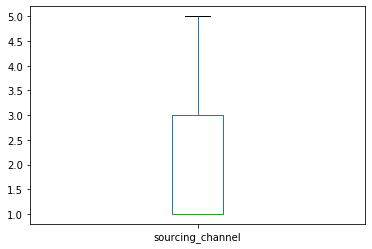

In [ ]:
train['sourcing_channel'].plot.box()

## age in days

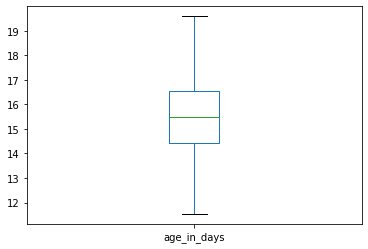

In [ ]:
train['age_in_days'].plot.box()

In [ ]:
Q1_age_train = train['age_in_days'].quantile(0.25)
Q3_age_train = train['age_in_days'].quantile(0.75)
IQR_age_train = Q3_age_train  - Q1_age_train 
upper_age_train = Q3_age_train + 1.5 * IQR_age_train
lower_age_train = Q1_age_train - 1.5 * IQR_age_train
upper_age_train, lower_age_train

(19.73536514458394, 11.22194691316557)

## Income

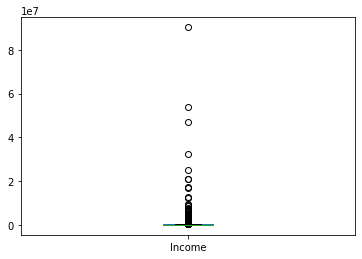

In [ ]:
train['Income'].plot.box()

## Count months late

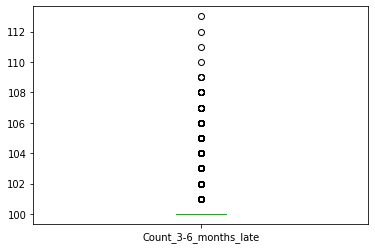

In [ ]:
train['Count_3-6_months_late'] = train['Count_3-6_months_late'] + 100
test['Count_3-6_months_late'] = test['Count_3-6_months_late'] + 100
train['Count_3-6_months_late'].plot.box()

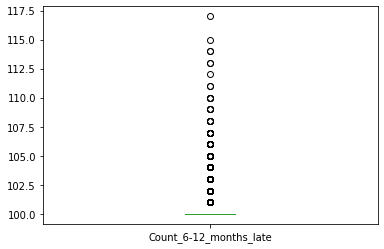

In [ ]:
train['Count_6-12_months_late'] = train['Count_6-12_months_late'] + 100
test['Count_6-12_months_late'] = test['Count_6-12_months_late'] + 100
train['Count_6-12_months_late'].plot.box()

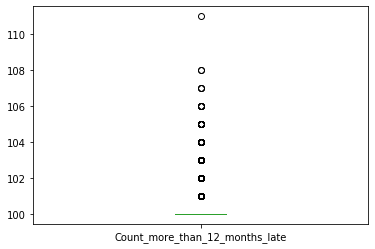

In [ ]:
train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'] + 100
test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'] + 100
train['Count_more_than_12_months_late'].plot.box()

## application_underwriting_score

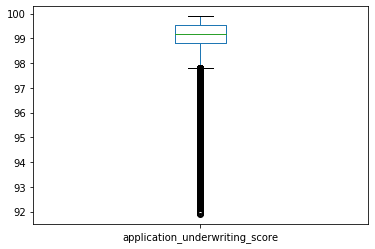

In [ ]:
train['application_underwriting_score'].plot.box()

In [ ]:
Q1_application_train = train['application_underwriting_score'].quantile(0.25)
Q3_application_train = train['application_underwriting_score'].quantile(0.75)
IQR_application_train = Q3_application_train  - Q1_application_train 
upper_application_train = Q3_application_train + 1.5 * IQR_application_train
lower_application_train = Q1_application_train - 1.5 * IQR_application_train
upper_application_train, lower_application_train

(100.55499999999999, 97.795)

## no_of_premiums_paid

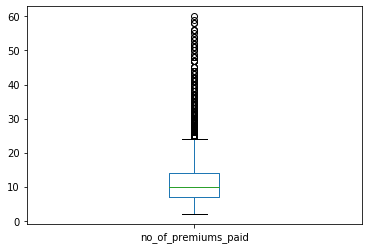

In [ ]:
train['no_of_premiums_paid'].plot.box()

In [ ]:
Q1_premiumpaid_train = train['no_of_premiums_paid'].quantile(0.25)
Q3_premiumpaid_train = train['no_of_premiums_paid'].quantile(0.75)
IQR_premiumpaid_train = Q3_premiumpaid_train  - Q1_premiumpaid_train 
upper_premiumpaid_train = Q3_premiumpaid_train + 1.5 * IQR_premiumpaid_train
lower_premiumpaid_train = Q1_premiumpaid_train - 1.5 * IQR_premiumpaid_train
upper_premiumpaid_train, lower_premiumpaid_train

(24.5, -3.5)

In [ ]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,target
count,79756.000000,79756.000000,79756.000000,7.975600e+04,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000,79756.000000
mean,57168.377288,0.209983,15.427597,2.089946e+05,100.248671,100.078188,100.060008,99.067053,10.874643,1.823123,0.938086
std,32930.361608,0.321384,1.464233,4.968563e+05,0.691468,0.436507,0.312023,0.726210,5.164617,1.052218,0.241001
min,2.000000,0.000000,11.532987,2.403000e+04,100.000000,100.000000,100.000000,91.900000,2.000000,1.000000,0.000000
25%,28640.750000,0.001156,14.414479,1.080500e+05,100.000000,100.000000,100.000000,98.830000,7.000000,1.000000,1.000000
50%,57262.500000,0.027889,15.501838,1.667400e+05,100.000000,100.000000,100.000000,99.180000,10.000000,1.000000,1.000000
75%,85637.250000,0.287296,16.542833,2.521100e+05,100.000000,100.000000,100.000000,99.520000,14.000000,3.000000,1.000000
max,114076.000000,1.000000,19.592070,9.026260e+07,113.000000,117.000000,111.000000,99.890000,60.000000,5.000000,1.000000


In [ ]:
x = train.drop(['target'], 1)

In [ ]:
x.loc[x['age_in_days']>18, 'age_in_days'] = np.mean(x['age_in_days'])

In [ ]:
x.loc[x['sourcing_channel']>=4, 'sourcing_channel'] = np.mean(x['sourcing_channel'])

In [ ]:
x.loc[x['no_of_premiums_paid']>25, 'no_of_premiums_paid'] = np.mean(x['no_of_premiums_paid'])

In [ ]:
x.loc[x['Income']>19000000, 'Income'] = np.mean(x['Income'])

In [ ]:
x.loc[x['Count_3-6_months_late']>101.5, 'Count_3-6_months_late'] = np.mean(x['Count_3-6_months_late'])

In [ ]:
x.loc[x['Count_6-12_months_late']>105, 'Count_6-12_months_late'] = np.mean(x['Count_6-12_months_late'])

In [ ]:
x.loc[x['Count_more_than_12_months_late']>104, 'Count_more_than_12_months_late'] = np.mean(x['Count_more_than_12_months_late'])

In [ ]:
x.loc[x['application_underwriting_score']<96, 'application_underwriting_score'] = np.max(x['application_underwriting_score'])

In [ ]:
y = train['target']

In [ ]:
x = pd.get_dummies(x)

In [ ]:
def rmsle(y, y_):
    y = np.exp(y),  
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(x,y, random_state = 101, stratify=y)

In [ ]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((59817, 12), (59817,), (19939, 12), (19939,))

# LinearRegression

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg = LinearRegression()

In [ ]:
lreg.fit(train_x,train_y)

LinearRegression()

In [ ]:
prediction = lreg.predict(val_x)

In [ ]:
rmsle(val_y, prediction)

0.13776147046425755

In [ ]:
lreg.score(val_x, val_y)

0.15193506433295023

In [ ]:
lreg.score(train_x, train_y)

0.1516968325816177

In [ ]:
print("Accuracy:",roc_auc_score(val_y, lreg.predict(val_x)))

Accuracy: 0.8256288782976495


# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(train_x,train_y)

LogisticRegression()

In [ ]:
logreg.score(train_x, train_y)

0.9380778039687714

In [ ]:
prediction = logreg.predict_proba(val_x)

In [ ]:
rmsle(val_y,[i[1] for i in prediction])

0.14934125912273838

In [ ]:
logreg.score(val_x, val_y)

0.9381112392798034

In [ ]:
roc_auc_score(val_y,[i[1] for i in prediction])

0.5773198301531455

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(max_depth=7)

In [ ]:
model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=7)

In [ ]:
model.score(train_x, train_y)

0.9433773007673404

In [ ]:
prediction = model.predict_proba(val_x)

In [ ]:
rmsle(val_y,[i[1] for i in prediction])

0.13872201185218958

In [ ]:
model.score(val_x, val_y)

0.938863533778023

In [ ]:
roc_auc_score(val_y,[i[1] for i in prediction])

0.8251180033593322

# Submission

In [ ]:
##as we saw the auc score is highest for linear regression so we use it for predicting probablities for test data

In [ ]:
lreg.fit(x,y)

LinearRegression()

In [ ]:
test_data =test
test_data = pd.get_dummies(test_data)


In [ ]:
test_prediction = lreg.predict(test_data)

In [ ]:
Submission = pd.DataFrame()

In [ ]:
Submission['id'] = test['id']

In [ ]:
Submission['target'] = test_prediction
Submission.loc[Submission['target']>0.9999, 'target'] = 1
Submission.loc[Submission['target']<0.005, 'target'] = 0

In [ ]:
Submission.to_csv('Submission_final.csv', header=True, index=False)

In [ ]:
pd.read_csv('Submission_final.csv')

,id,target
0,649,1.000000
1,81136,0.975741
2,70762,0.885206
3,53935,0.972431
4,15476,0.919476
...,...,...
34219,81988,0.957943
34220,30326,0.999432
34221,65749,0.957071
34222,65686,0.708178
